# Import 

## Library 

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import re,seaborn as sns
import warnings
warnings.filterwarnings('ignore')

#Models
from sklearn import svm
from sklearn.svm import SVC

#train test split
from sklearn.model_selection import train_test_split

# Standar Scaler
from sklearn.preprocessing import StandardScaler

#Calculate the Accuracy
from sklearn.metrics import accuracy_score

#Make cross validation
from sklearn.model_selection import cross_val_score

#Calculate the Area bellow Curve
from sklearn.metrics import roc_curve, auc

# Metrix
from sklearn import metrics

#Does the Gridsearch
from sklearn.model_selection import GridSearchCV

#Confussion Matrix 
from sklearn.metrics import confusion_matrix


# 3d
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.colors import ListedColormap
import plotly.express as py 

# Missin Analysis
import missingno as msno

# For make 3d Grafic
from mpl_toolkits.mplot3d import Axes3D  
import matplotlib.pyplot as plt

# Library by matplotlib for access diferent color palete
from matplotlib import cm

from sklearn.tree import DecisionTreeClassifier

## DataSet

O - Obtaining our data 

S - Scrubbing / Cleaning our data

E - Exploring / Visualizing our data will allow us to find patterns and trends

M - Modeling our data will give us our predictive power as a wizard

N - INterpreting our data

In [9]:
df = pd.read_csv('diabetes.csv')

In [10]:
df.shape

(768, 9)

In [11]:
df.head()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1

In [12]:
df.Pregnancies.unique()

array([ 6,  1,  8,  0,  5,  3, 10,  2,  4,  7,  9, 11, 13, 15, 17, 12, 14],
      dtype=int64)

# EDA

## See types,columns, nulls, memory 

In [13]:
df.shape

(768, 9)

In [14]:
df

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  Outcome  
0                       0.627   50        1  
1                       0.351   31        0  
2                       0.672   32        1  
3                       0.167   21        0  
4                       2.288   33        1  
..                        ...  ...      ...  
763                     0.171   63        0  
764                     0.340   27        0  
765                     0.245   30        0  
766                     0.349   47        1  
767                     0.315   23        0  

[768 rows x 9 columns]

In [15]:
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


function reference : https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.info.html

## Describe

DataFrame.describe() method generates descriptive statistics that summarize the central tendency, dispersion and shape of a dataset’s distribution, excluding NaN values. This method tells us a lot of things about a dataset. One important thing is that the describe() method deals only with numeric values. It doesn't work with any categorical values. So if there are any categorical values in a column the describe() method will ignore it and display summary for the other columns unless parameter include="all" is passed.

Now, let's understand the statistics that are generated by the __describe()__ method:

**count tells us the number of NoN-empty rows in a feature.**

**mean tells us the mean value of that feature.**

**std tells us the Standard Deviation Value of that feature.**

**min tells us the minimum value of that feature.**

**25%, 50%, and 75% are the percentile/quartile of each features. This quartile information helps us to detect Outliers.**

**max tells us the maximum value of that feature.**


In [16]:
df.describe()

Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.369578   31.972618      19.355807      15.952218  115.244002   
min       0.000000    0.000000       0.000000       0.000000    0.000000   
25%       1.000000   99.000000      62.000000       0.000000    0.000000   
50%       3.000000  117.000000      72.000000      23.000000   30.500000   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  768.000000                768.000000  768.000000  768.000000  
mean    31.992578                  0.471876   33.240885    0.348958  
std      7.884160                  0.331329   11.760232    0.476951  
min      0.000000                  0.078000   21.000000    0.000000  
25%     27.300000                  0.243750   24.000000    0.000000  
50%     32.000000                  0.372500   29.000000    0.000000  
75%     36.600000                  0.626250   41.000000    1.000000  
max     67.100000                  2.420000   81.000000    1.000000

For reference: https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.describe.html#pandas.DataFrame.describe

In [17]:
df_copy = df.copy(deep = True)
df_copy[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']] = df_copy[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']].replace(0,np.NaN)

## showing the count of Nans
print(df_copy.isnull().sum())

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64


To fill these Nan values the data distribution needs to be understood

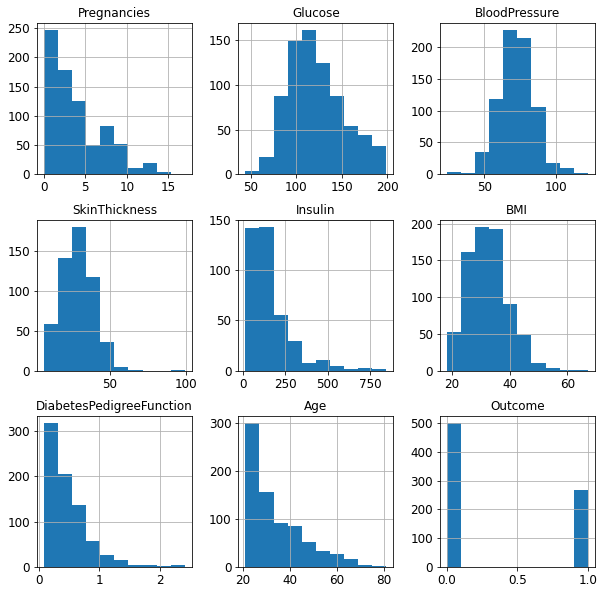

In [18]:
p = df_copy.hist(figsize = (10,10))

In [19]:
df_copy['Glucose'].fillna(df_copy['Glucose'].mean(), inplace = True)
df_copy['BloodPressure'].fillna(df_copy['BloodPressure'].mean(), inplace = True)
df_copy['SkinThickness'].fillna(df_copy['SkinThickness'].median(), inplace = True)
df_copy['Insulin'].fillna(df_copy['Insulin'].median(), inplace = True)
df_copy['BMI'].fillna(df_copy['BMI'].median(), inplace = True)

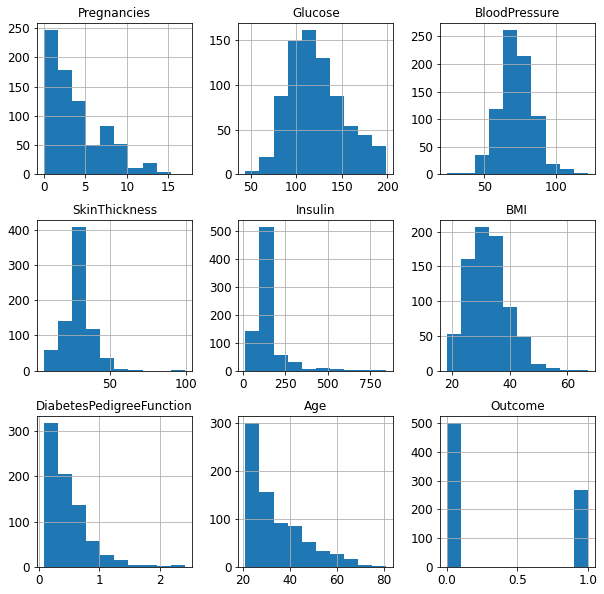

In [20]:
p = df_copy.hist(figsize = (10,10))

### Skewness

A left-skewed distribution has a long left tail. Left-skewed distributions are also called negatively-skewed distributions. That’s because there is a long tail in the negative direction on the number line. The mean is also to the left of the peak.

A right-skewed distribution has a long right tail. Right-skewed distributions are also called positive-skew distributions. That’s because there is a long tail in the positive direction on the number line. The mean is also to the right of the peak.



to learn more about skewness
https://www.statisticshowto.datasciencecentral.com/probability-and-statistics/skewed-distribution/

In [21]:
df.shape

(768, 9)

## Dtypes

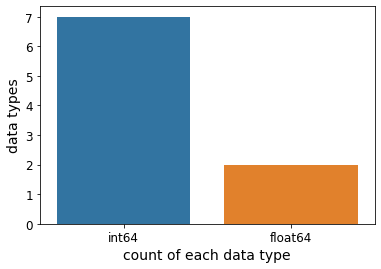

In [22]:
sns.countplot(df.dtypes.map(str))
plt.xlabel("count of each data type")
plt.ylabel("data types")
plt.show()

## Missingno  analysis

### describe

In [23]:
df_copy.describe().info()

<class 'pandas.core.frame.DataFrame'>
Index: 8 entries, count to max
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               8 non-null      float64
 1   Glucose                   8 non-null      float64
 2   BloodPressure             8 non-null      float64
 3   SkinThickness             8 non-null      float64
 4   Insulin                   8 non-null      float64
 5   BMI                       8 non-null      float64
 6   DiabetesPedigreeFunction  8 non-null      float64
 7   Age                       8 non-null      float64
 8   Outcome                   8 non-null      float64
dtypes: float64(9)
memory usage: 640.0+ bytes


### isna

This returns a summary of how many missing values are contained within the dataframe. The isna() part detects missing values within the dataframe and returns a Boolean value for each element in the dataframe. The sum() part sums up the number of True values.

The following information is returned by this line.

In [24]:
df_copy.isna().sum().sort_values( ascending = True )

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

The barplot provides a simple plot where each bar represents a column within the dataframe. The height of the bar indicates how complete that column is, i.e, how many non-null values are present. It can be generated by calling upon:

### bar

The barplot provides a simple plot where each bar represents a column within the dataframe. The height of the bar indicates how complete that column is, i.e, how many non-null values are present. It can be generated by calling upon:

<AxesSubplot:>

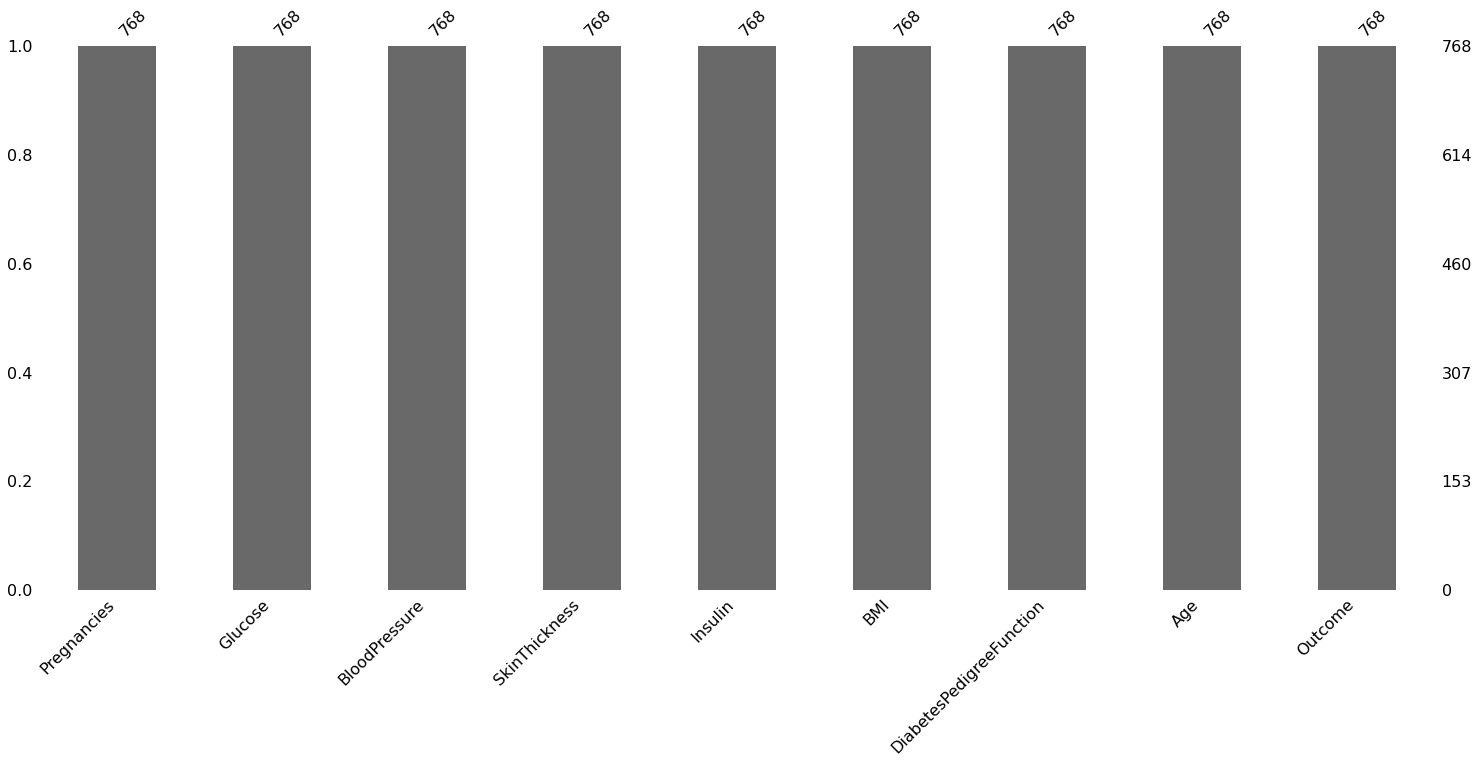

In [25]:
msno.bar(df_copy)

### Matrix Analysis

The matrix plot is a great tool if you are working with depth-related data or time-series data. It provides a colour fill for each column. When data is present, the plot is shaded in grey (or your colour of choice), and when it is absent the plot is displayed in white.

The matrix plot can be generated by calling upon:

<AxesSubplot:>

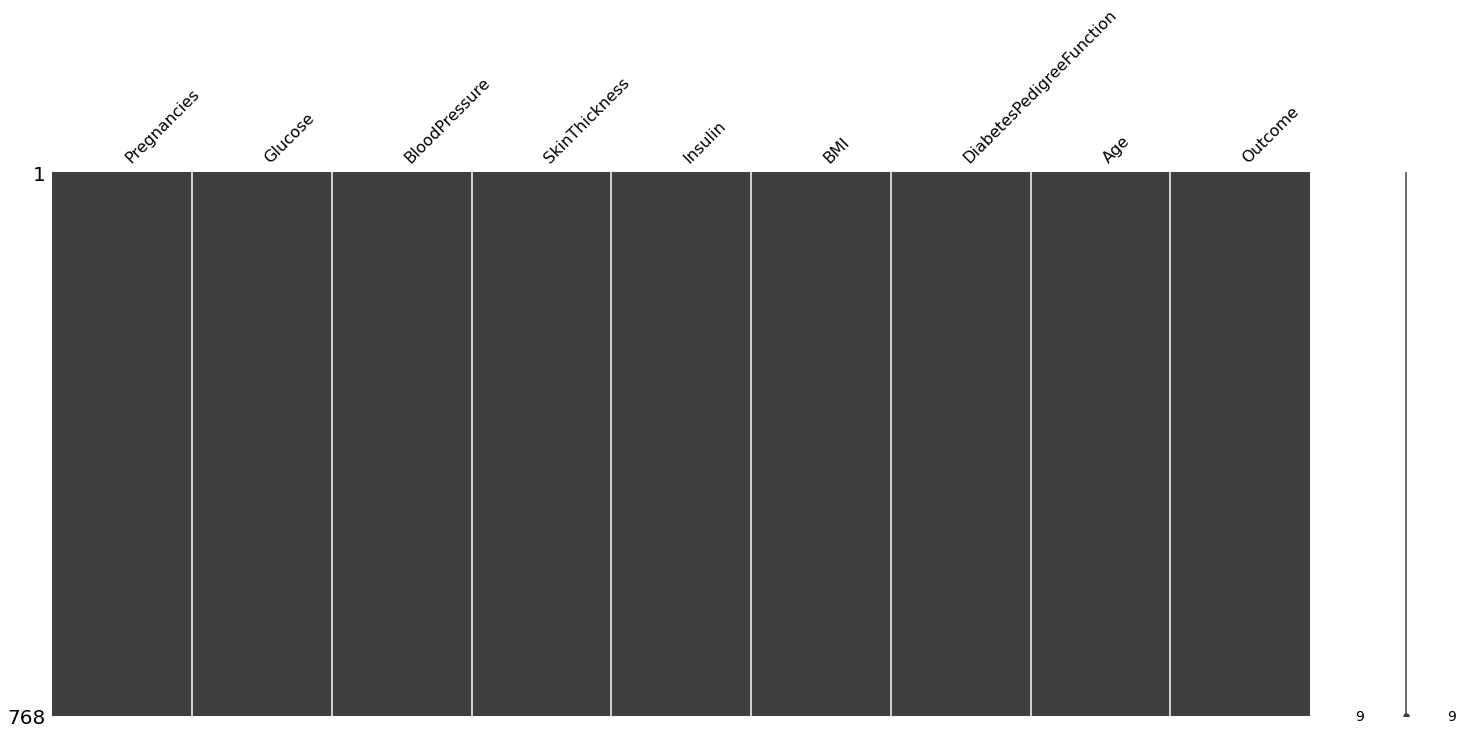

In [26]:
msno.matrix(df_copy)

### Heatmap


The heatmap is used to identify correlations of the nullity between each of the different columns. In other words, it can be used to identify if there is a relationship in the presence of null values between each of the columns.

Values close to positive 1 indicate that the presence of null values in one column is correlated with the presence of null values in another column.

Values close to negative 1 indicate that the presence of null values in one column is anti-correlated with the presence of null values in another column. In other words, when null values are present in one column, there are data values present in the other column, and vice versa.

Values close to 0, indicate there is little to no relationship between the presence of null values in one column compared to another.

There are a number of values that show as <-1. This indicates that the correlation is very close to being 100% negative.

The heatmap can be generated by the following code:

In [27]:
# msno.heatmap(df_copy)

In [28]:
# msno.dendrogram(df_copy)

## balance of the data

<AxesSubplot:xlabel='Outcome', ylabel='count'>

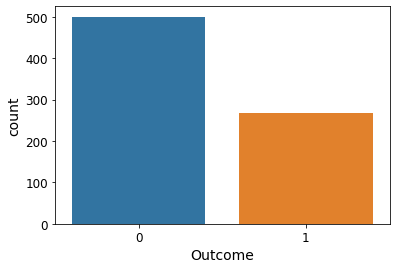

In [29]:
sns.countplot(x = 'Outcome', data = df_copy)

## PairPLot

The pairs plot builds on two basic figures, the histogram and the scatter plot. The histogram on the diagonal allows us to see the distribution of a single variable while the scatter plots on the upper and lower triangles show the relationship (or lack thereof) between two variables.¶
For Reference: https://towardsdatascience.com/visualizing-data-with-pair-plots-in-python-f228cf529166

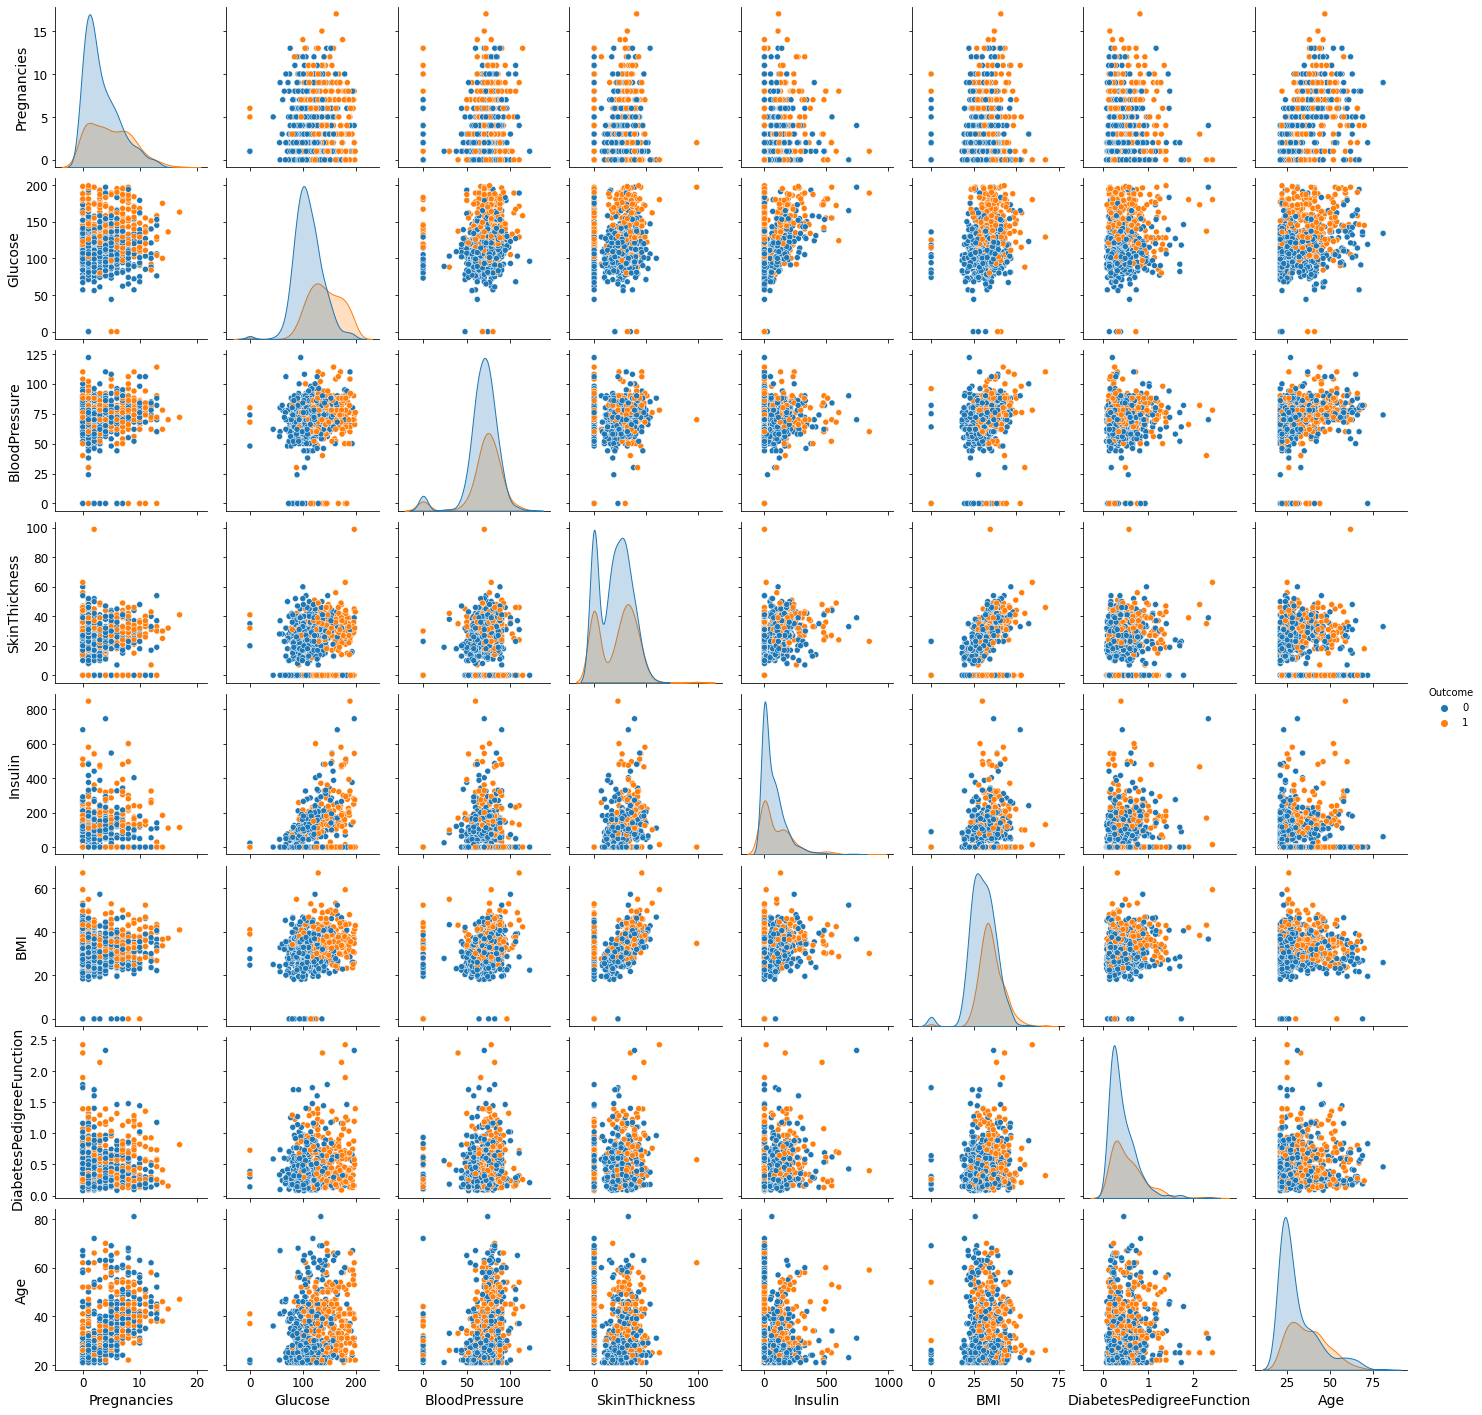

In [30]:
sns.pairplot(df, hue = 'Outcome' )

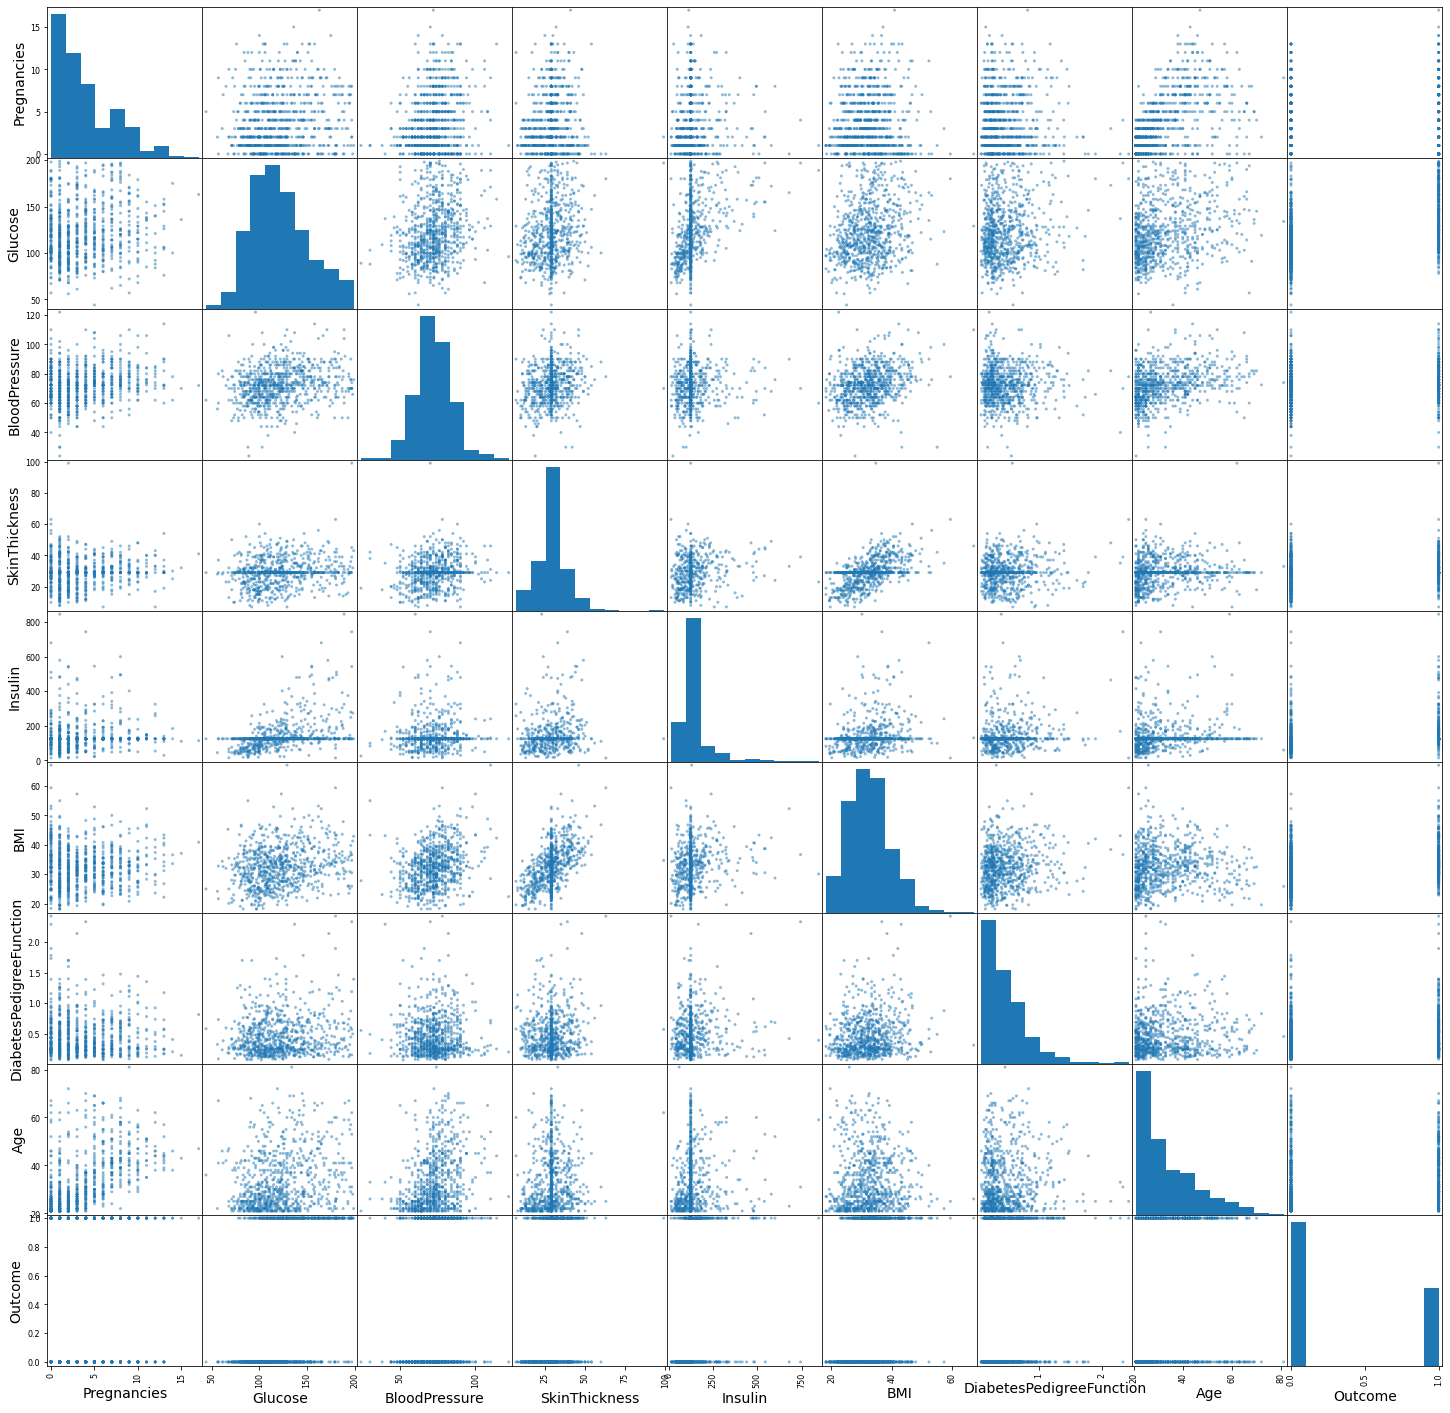

In [31]:
from pandas.plotting import scatter_matrix
p=scatter_matrix(df_copy,figsize=(25, 25))

## PLot 3D

In [32]:
fig = py.scatter_3d(df,x='Glucose',y='Age',z='BMI',color ='Outcome',animation_group = 'Age',opacity = 0.6)

fig.show()

In [33]:
df.columns.values

array(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness',
       'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype=object)

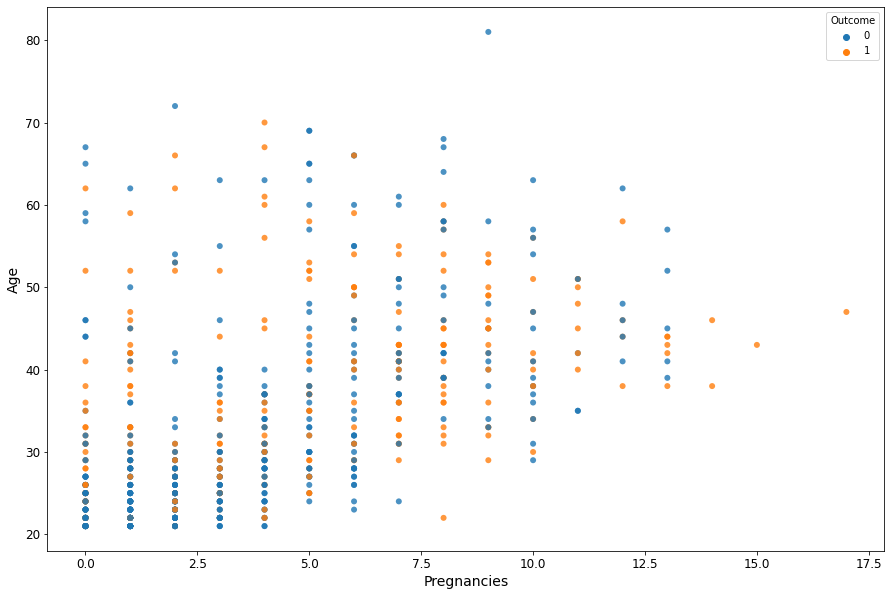

In [34]:
# Un scatter plot para visualizar dos variables
fig, (ax0) = plt.subplots(1,1,figsize=(15,10))
g=sns.scatterplot(x = "Pregnancies", y = "Age", data = df, hue = 'Outcome', linewidth=0, alpha = 0.8,ax=ax0)
plt.show()

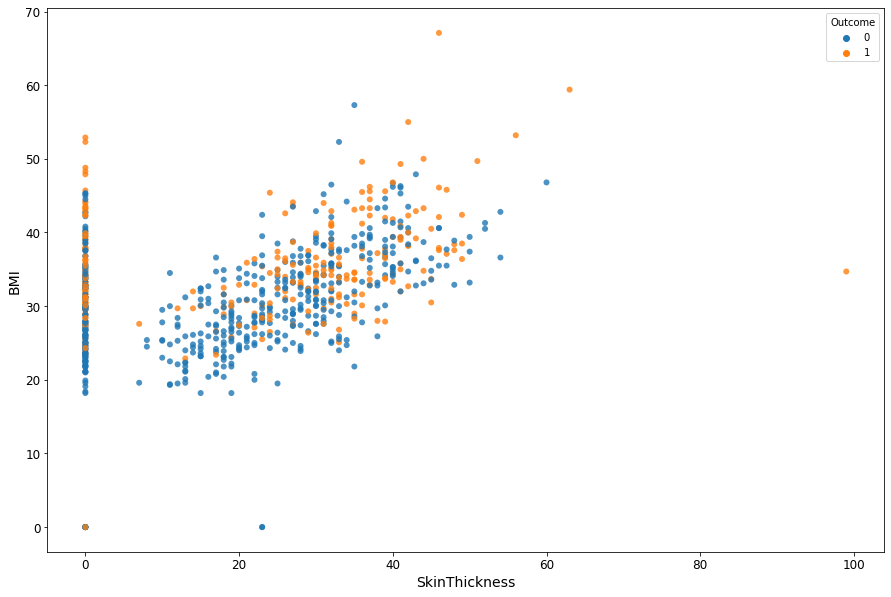

In [35]:
# Un scatter plot para visualizar dos variables
fig, (ax0) = plt.subplots(1,1,figsize=(15,10))
g=sns.scatterplot(x = "SkinThickness", y = "BMI", data = df, hue = 'Outcome', linewidth=0, alpha = 0.8,ax=ax0)
plt.show()

## Correlation Matrix

Pearson's Correlation Coefficient: helps you find out the relationship between two quantities. It gives you the measure of the strength of association between two variables. The value of Pearson's Correlation Coefficient can be between -1 to +1. 1 means that they are highly correlated and 0 means no correlation.

A heat map is a two-dimensional representation of information with the help of colors. Heat maps can help the user visualize simple or complex information.

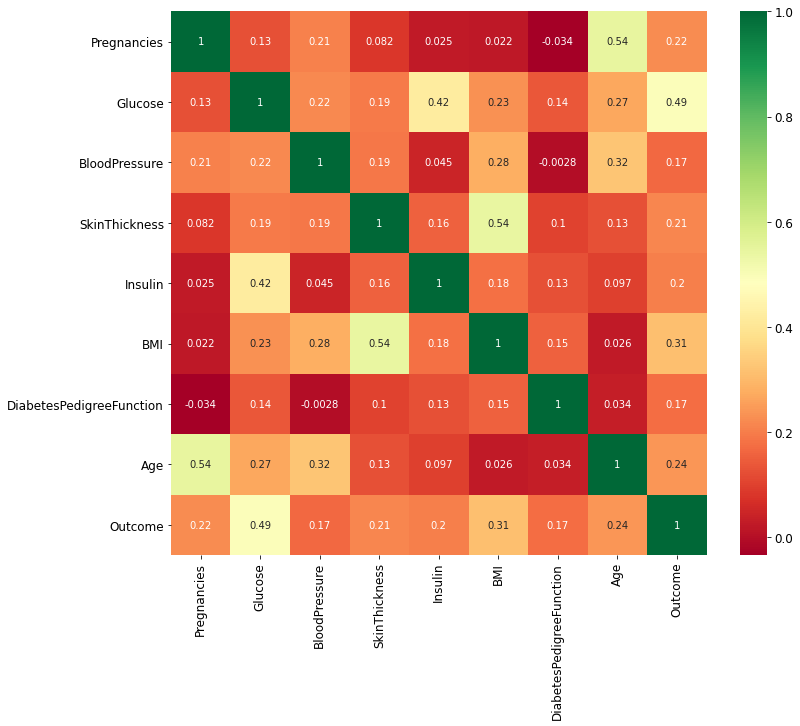

In [36]:
plt.figure(figsize=(12,10))
sns.heatmap( df_copy.corr(),annot=True,cmap ='RdYlGn' )
plt.show()

## The scale of the features

In [37]:
df.columns.values

array(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness',
       'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype=object)

<AxesSubplot:>

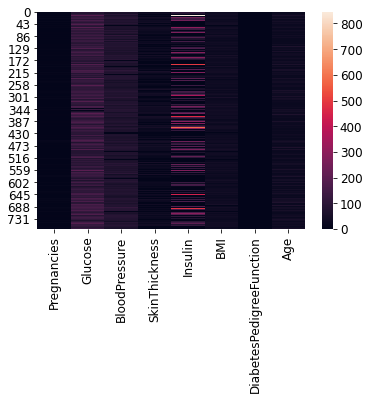

In [38]:
sns.heatmap(df[['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness',
       'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']])

# Preprocessing 

## Define X e Y

### Define X

In [39]:
X = df[['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age']]
X

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  
0                       0.627   50  
1                       0.351   31  
2                       0.672   32  
3                       0.167   21  
4                       2.288   33  
..                        ...  ...  
763                     0.171   63  
764                     0.340   27  
765                     0.245   30  
766                     0.349   47  
767                     0.315   23  

[768 rows x 8 columns]

#### Heatmap X (Features)

<AxesSubplot:>

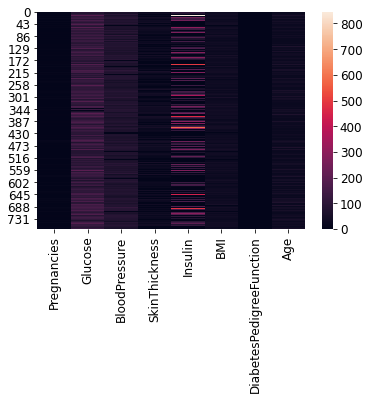

In [40]:
sns.heatmap(X)

### Define Y

In [41]:
y = df[['Outcome']]
y

Outcome
0          1
1          0
2          1
3          0
4          1
..       ...
763        0
764        0
765        0
766        1
767        0

[768 rows x 1 columns]

## Split

In [42]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state=4)

In [43]:
print(f'Set train features : {X_train.shape}')
print(f'Set train target   : {y_train.shape}')

print(f'\nSet test features : {X_test.shape}')
print(f'Set test target   : {y_test.shape}')

Set train features : (537, 8)
Set train target   : (537, 1)

Set test features : (231, 8)
Set test target   : (231, 1)


## Scaler Object

 <img src="0_PXGPVYIxyI_IEHP7_.png">

In [44]:
scaler = StandardScaler().fit(X_train)

## Transform 

### X train

In [45]:
X_train_scal = scaler.transform( X_train )

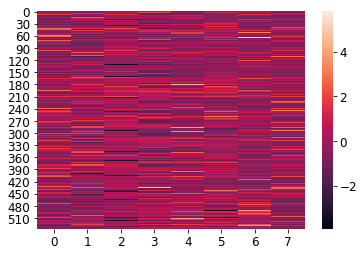

In [46]:
sns.heatmap( X_train_scal )
plt.show()

### X test

In [47]:
X_test_scal = scaler.transform( X_test ) 

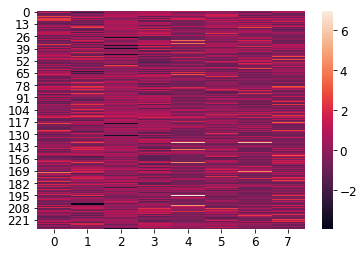

In [48]:
sns.heatmap( X_test_scal )
plt.show()

Text(0.5, 1.0, 'Test data')

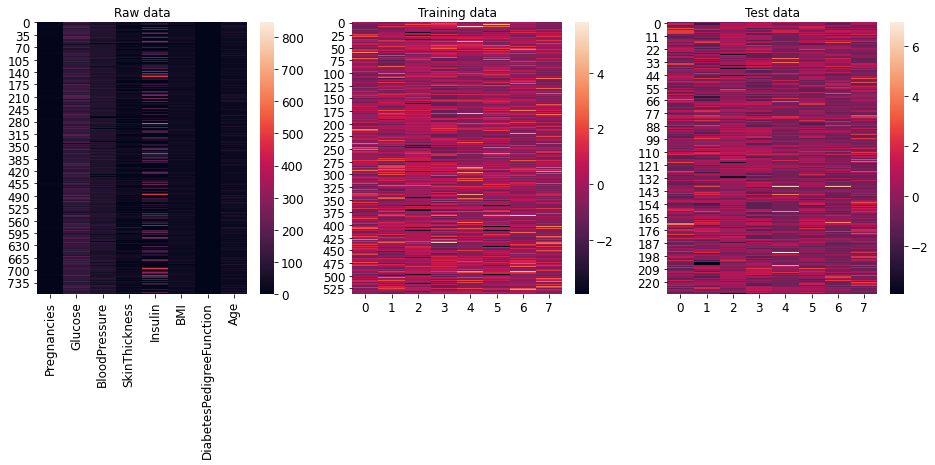

In [49]:
fig, axs = plt.subplots(1, 3, figsize=(16,5))
sns.heatmap(X, ax = axs[0])
sns.heatmap(X_train_scal, ax = axs[1])
sns.heatmap(X_test_scal, ax = axs[2])
axs[0].set_title('Raw data')
axs[1].set_title('Training data')
axs[2].set_title('Test data')

# Decision Trees Model

## Define model, hyperparameters and GridserchCV

In [50]:
# #Define model
tree_clf = DecisionTreeClassifier()

tree_para = {'criterion':['gini','entropy'],'max_depth':[4,5,6,7,8,9,10,11,12,15,20,30,40,50,70,90,120,150]}

#Define GridserchCV
clf = GridSearchCV(tree_clf,                    # model
                   param_grid = tree_para,   # hyperparameters
                   scoring='accuracy',        # metric for scoring
                   cv=10)                     # number of folds

# Training Model
clf.fit(X_train_scal,y_train)

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [4, 5, 6, 7, 8, 9, 10, 11, 12, 15, 20, 30,
                                       40, 50, 70, 90, 120, 150]},
             scoring='accuracy')

# Perfomance Metrics 

In [51]:
# Toda la informacion del entrenamiento esta en cv_results_
scores = clf.cv_results_
#Veamosla ...
pd.DataFrame.from_dict(scores).head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0       0.005188      0.001937         0.000304        0.000464   
1       0.003701      0.000643         0.000798        0.000399   
2       0.004199      0.001679         0.000399        0.000488   
3       0.004146      0.001221         0.000702        0.000460   
4       0.004287      0.001936         0.000604        0.000660   

  param_criterion param_max_depth                                 params  \
0            gini               4  {'criterion': 'gini', 'max_depth': 4}   
1            gini               5  {'criterion': 'gini', 'max_depth': 5}   
2            gini               6  {'criterion': 'gini', 'max_depth': 6}   
3            gini               7  {'criterion': 'gini', 'max_depth': 7}   
4            gini               8  {'criterion': 'gini', 'max_depth': 8}   

   split0_test_score  split1_test_score  split2_test_score  split3_test_score  \
0           0.722222           0.759259           0.777778           0.759259   
1           0.703704           0.796296           0.703704           0.740741   
2           0.592593           0.851852           0.740741           0.703704   
3           0.592593           0.851852           0.814815           0.759259   
4           0.574074           0.851852           0.759259           0.666667   

   split4_test_score  split5_test_score  split6_test_score  split7_test_score  \
0           0.777778           0.703704           0.666667           0.698113   
1           0.722222           0.703704           0.703704           0.773585   
2           0.722222           0.722222           0.648148           0.811321   
3           0.722222           0.722222           0.685185           0.849057   
4           0.685185           0.629630           0.666667           0.792453   

   split8_test_score  split9_test_score  mean_test_score  std_test_score  \
0           0.792453           0.735849         0.739308        0.038892   
1           0.735849           0.792453         0.737596        0.035488   
2           0.754717           0.735849         0.728337        0.069704   
3           0.716981           0.754717         0.746890        0.074840   
4           0.698113           0.754717         0.707862        0.077941   

   rank_test_score  
0                3  
1                4  
2               15  
3                1  
4               29

## The Best Combination

In [52]:
print( "The best parameters are %s \n" % (clf.best_params_ ) )
print("Score of train : %0.2f" % clf.best_score_)

The best parameters are {'criterion': 'gini', 'max_depth': 7} 

Score of train : 0.75


In [53]:
y_pred = clf.predict(X_test_scal )
y_pred

array([1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1,
       0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0,
       1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0], dtype=int64)

## Accuracy


In [54]:
print('Accuracy %0.3f' % metrics.accuracy_score(y_test,y_pred))

Accuracy 0.758


## Roc curve

In [55]:
#compute and plot AUC
y_proba = clf.predict_proba( X_test_scal )
fpr1, tpr1, thresholds = roc_curve(y_test, y_proba[:,1], drop_intermediate = False)
auc = metrics.auc(fpr1, tpr1)
print("El AUC es = " + str(auc))

El AUC es = 0.7746085942704863


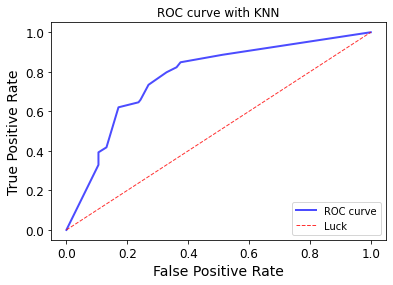

In [56]:
plt.plot(fpr1, tpr1, lw=2, alpha=0.7 , label = 'ROC curve', color = 'b')
plt.plot([0, 1], [0, 1], linestyle='--', lw=1, color='r',label='Luck', alpha=.8)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.grid(False)
plt.legend(loc="lower right")
plt.title('ROC curve with KNN')
plt.show()

## Confusion Matrix

In [57]:
# Plot Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[126  26]
 [ 30  49]]


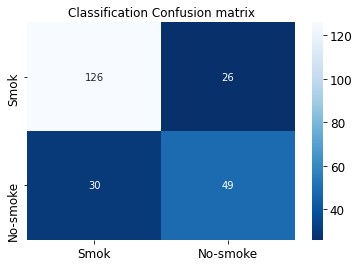

In [58]:
# Compute confusion Matrix
cm = confusion_matrix(y_test, y_pred)
df_cm = pd.DataFrame(cm, index = ['Smok', 'No-smoke'], columns = ['Smok', 'No-smoke'])
plt.figure(figsize = (6,4))
sns.heatmap(df_cm, annot=True, cmap="Blues_r", fmt = 'g')
plt.title('Classification Confusion matrix')
plt.show()

# The best parameters are {'C': 0.1, 'penalty': 'l2', 'solver': 'lbfgs'} 

## Learning Curve

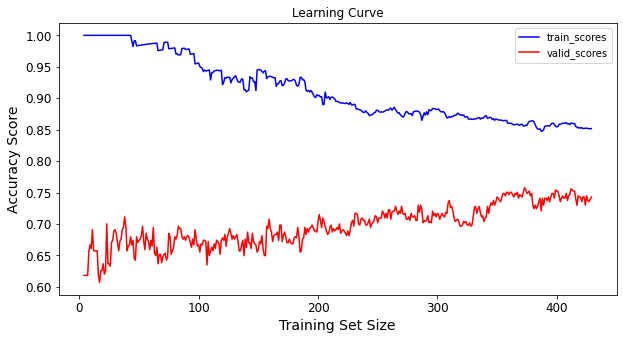

In [59]:
from sklearn.model_selection import learning_curve
plt.figure( figsize=(10,5) )
train_sizes, train_scores, valid_scores = learning_curve( DecisionTreeClassifier(criterion= 'gini', max_depth= 5), 
                                                          X_train_scal, y_train, 
                                                          train_sizes=np.linspace(0.01,1.0,1000), 
                                                          cv=5)

plt.plot(train_sizes, np.mean(train_scores, 1), color='blue')
plt.plot(train_sizes, np.mean(valid_scores, 1), color='red')
plt.title("Learning Curve")
plt.xlabel("Training Set Size")
plt.ylabel("Accuracy Score")
plt.legend(['train_scores','valid_scores'])


# Decision Trees

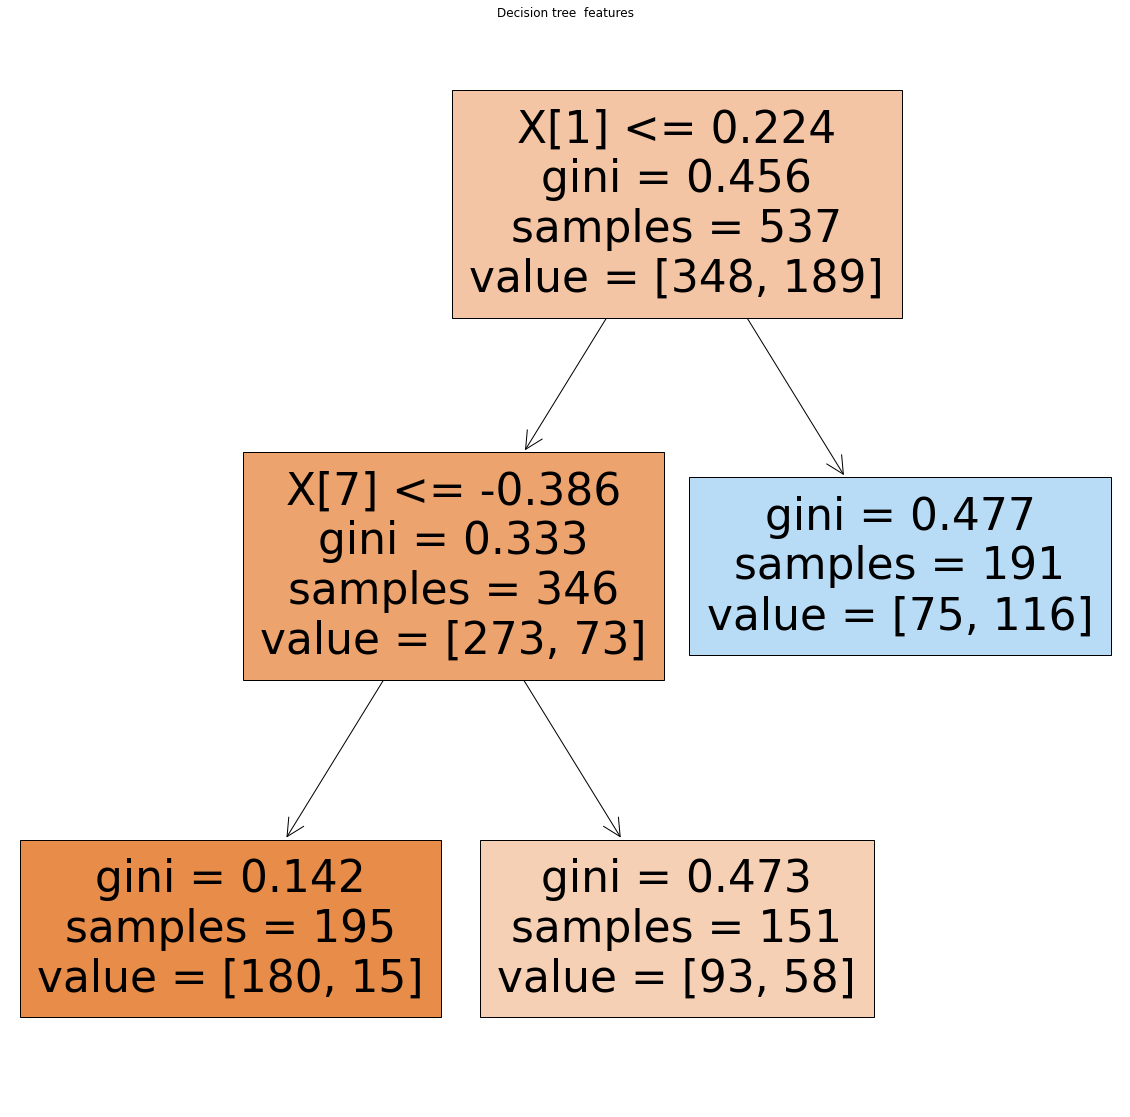

In [75]:
from sklearn.tree import plot_tree
from sklearn import tree
clf = tree.DecisionTreeClassifier(max_leaf_nodes=3, random_state=0)
clf = clf.fit(X_train_scal, y_train)

plt.figure( figsize=(20,20))
plot_tree(clf, filled=True)
plt.title("Decision tree  features")
plt.show()

https://scikit-learn.org/stable/auto_examples/tree/plot_unveil_tree_structure.html#sphx-glr-auto-examples-tree-plot-unveil-tree-structure-py